In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Imoirt the packages to plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Import the data

In [56]:
# visualize the train data set
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# visualize the test data set
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
# visualize the gender submission data set
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **Cleaning the data**

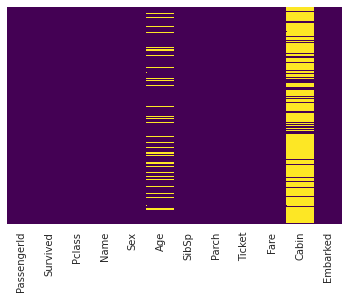

In [59]:
# check if there are missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Because cabins are grouped into categories by distinctive letters and most of the passengers' cabins are unknown,  only cabins' letters are considered. Unknown cabins are then grouped with the letter Z. This allows unknown cabins to be considered as a category in of themselves.

In [61]:
# consider only the letters of the cabins
train['Cabin'] = train['Cabin'].str[0]

In [62]:
# create the function to substitute unknown cabins with the letter Z
def input_Cabin(col):
    
    if pd.isnull(col):
        return 'Z'
    else:
        return col

In [63]:
# we run the function so we can consider the unkown cabins as a category
train['Cabin']  = train['Cabin'].apply(input_Cabin)

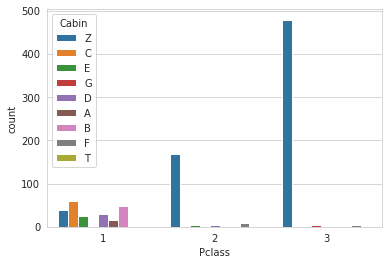

In [64]:
# it is checked if the type of cabin is related to the class
sns.countplot(x='Pclass',hue='Cabin',data=train)

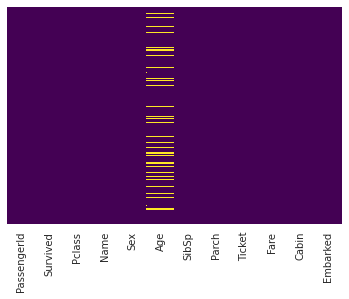

In [65]:
# check the missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The next step is deciding what to do with the missing age

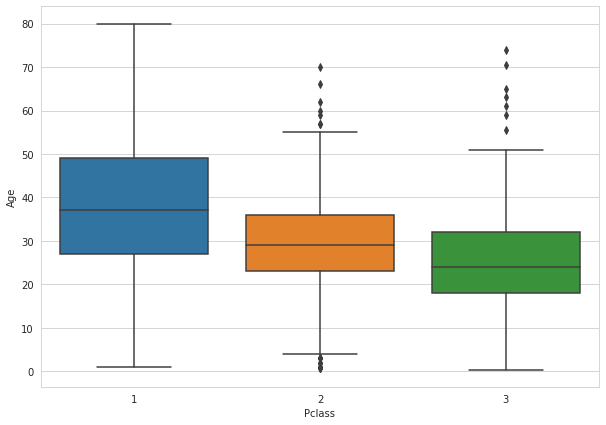

In [67]:
# it is checked if the age is related to the class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

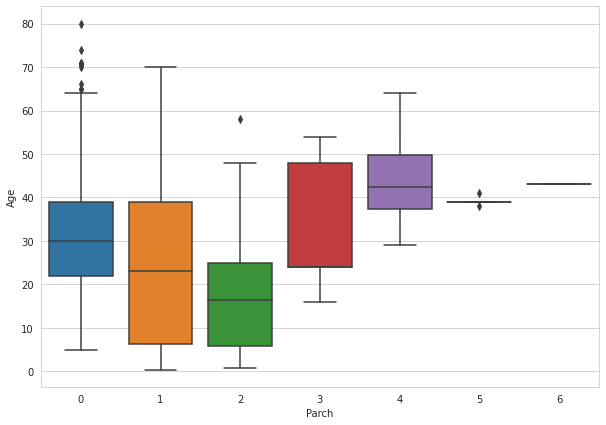

In [68]:
# it is checked if the age is related to the number of parents/children on board
plt.figure(figsize=(10,7))
sns.boxplot(x='Parch',y='Age',data=train)

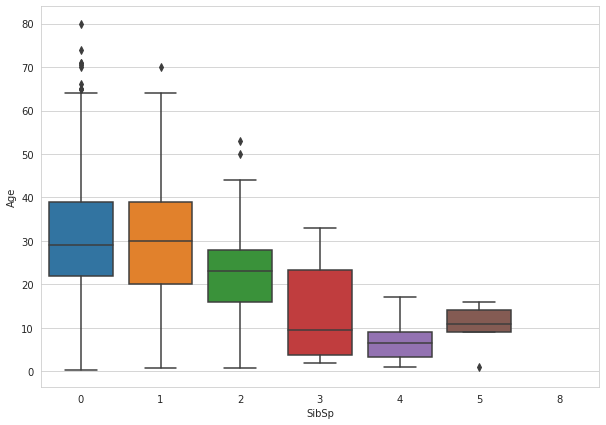

In [69]:
# it is checked if the age is related to the number of siblings/spouce on board
plt.figure(figsize=(10,7))
sns.boxplot(x='SibSp',y='Age',data=train)

It can be observed that different ages tend to have a different number of parents/children and of siblings/spouse on board

In [70]:
SibSp_range = np.sort(train[pd.notnull(train["Age"])]['SibSp'].unique())
Parch_range = np.sort(train[pd.notnull(train["Age"])]['Parch'].unique())

In [71]:
# because we don't know any of the ages of the passengers that had 8 siblings and spouses on board we only consider the average age of the gropus between 0 and 5

mean_sibsp = {}
for s in SibSp_range:
    mean_sibsp[s] = (train[train['SibSp']==s]['Age'].mean())

mean_parch = {}
for p in Parch_range:
    mean_parch[p] = (train[train['Parch']==p]['Age'].mean())

In [72]:
# create the function
def input_Age(cols,mean_sibsp,mean_parch,SibSp_range,Parch_range):
    Age = cols[0]
    SibSp = int(cols[1])
    Parch = int(cols[2])
    if pd.isnull(Age):
        if SibSp not in SibSp_range:
            s = mean_parch[Parch]
            p = mean_parch[Parch]
        elif Parch not in  Parch_range:
            s = mean_sibsp[SibSp]
            p = mean_parch[SibSp]
        elif SibSp not in SibSp_range and Parch not in  Parch_range:
            s = 29.5 # avarege age on board
            p = 29.5 # average age on board
        else:
            s = mean_sibsp[SibSp]
            p = mean_parch[Parch]
        Age = (s + p)/2
        return Age
    else:
        return Age

In [73]:
train['Age']  = train[['Age','SibSp','Parch']].apply(input_Age,axis=1,args=(mean_sibsp,mean_parch,SibSp_range,Parch_range))

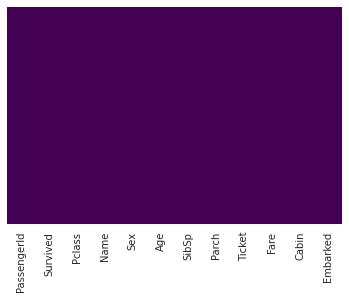

In [74]:
# check the missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are still two passengers for whom we don't know where they embarked.

In [76]:
# first it is checked if these passengers were alone or if they have any common features
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


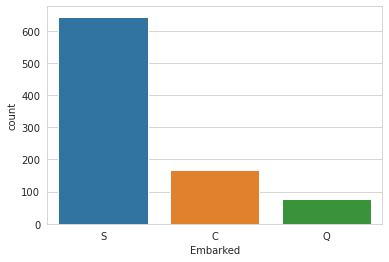

In [77]:
# it is checked how many people embarked at the different cities
sns.countplot(x='Embarked',data=train)

Because most people embarked in Southampton, it is most likely that these two passengers embarked in Southampton as well.

In [78]:
# create the function
def input_Embarked(col):
    if pd.isnull(col):
        return 'S'
    else:
        return col

In [79]:
train['Embarked']  = train['Embarked'].apply(input_Embarked)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Exploratory data analysis**

Now that the data have been cleaned they are ready to be analysed

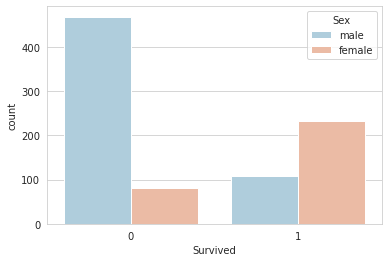

In [81]:
# it is first checked whether one sex was more likely to survive than another
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Text(0.5, 0, 'Age')

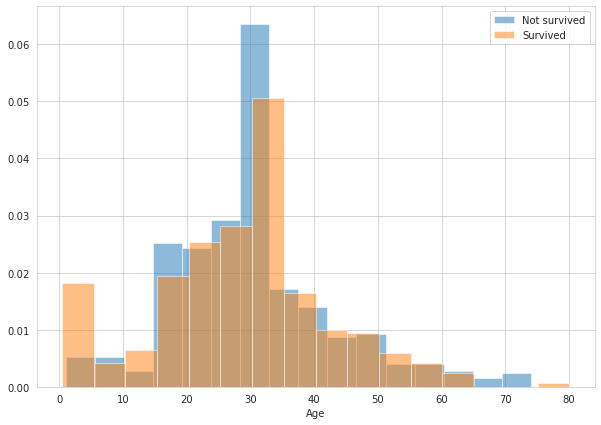

In [82]:
# then if the age contributes in any way with the chance of survival
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Age'],label='Not survived', alpha=0.5,bins=16,density=True)
plt.hist(train[train['Survived']==1]['Age'],label='Survived',alpha=0.5,bins=16,density=True)
plt.legend()
plt.xlabel('Age')

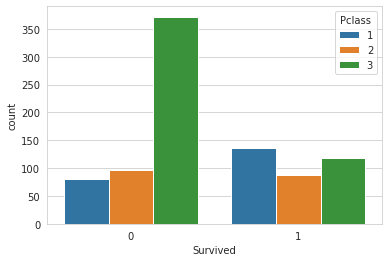

In [83]:
# if the class affects the chance of survival
sns.countplot(x='Survived',hue='Pclass',data=train)

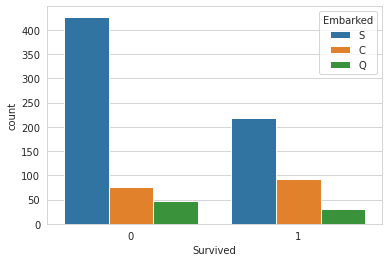

In [84]:
# if the port they have embarked at affects the chance of survival
sns.countplot(x='Survived',hue='Embarked',data=train)

In [85]:
# calculte the percentage of people who survived depending on where they embarked
s = train[train['Embarked']=='S']['Survived']
rate_s = round(100*sum(s)/len(s),0)

c = train[train['Embarked']=='C']['Survived']
rate_c = round(100*sum(c)/len(c),0)

q = train[train['Embarked']=='Q']['Survived']
rate_q = round(100*sum(q)/len(q),0)

print("% of people embarked at Southampton who survived:", rate_s, '%')
print("% of people embarked at Cerbourg who survived:", rate_c, '%')
print("% of people embarked at Queenstown who survived:", rate_q, '%')

% of people embarked at Southampton who survived: 34.0 %
% of people embarked at Cerbourg who survived: 55.0 %
% of people embarked at Queenstown who survived: 39.0 %


Text(0.5, 0, 'Fare')

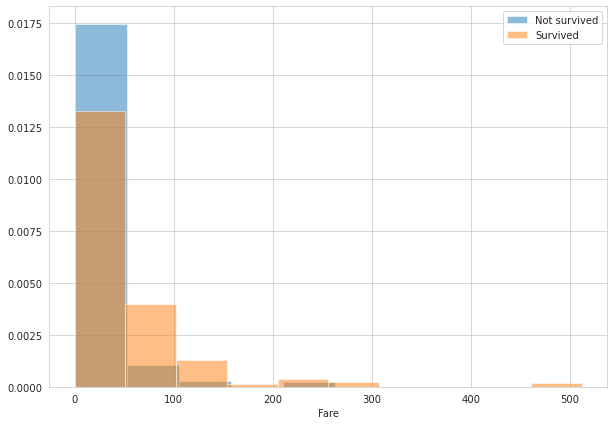

In [86]:
# then if the fare contributes in any way with the chance of survival
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Fare'],label='Not survived', alpha=0.5,bins=5,density=True)
plt.hist(train[train['Survived']==1]['Fare'],label='Survived',alpha=0.5,bins=10,density=True)
plt.legend()
plt.xlabel('Fare')

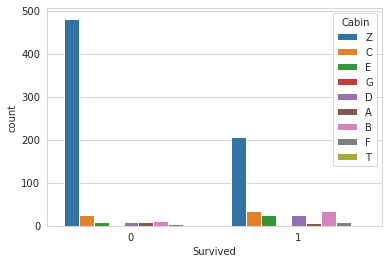

In [87]:
# plot to see if the cabin is related to survival chance
sns.countplot(x='Survived',hue='Cabin',data=train)

In [88]:
# calculte the percentage of people who survived depending on where they embarked

for n in train['Cabin'].unique():
    a = train[train['Cabin']== n]['Survived']
    rate = round(100*sum(a)/len(a),0)
    print("% of people in a cabin in sector ", n, " who survived:", rate, '%')

% of people in a cabin in sector  Z  who survived: 30.0 %
% of people in a cabin in sector  C  who survived: 59.0 %
% of people in a cabin in sector  E  who survived: 75.0 %
% of people in a cabin in sector  G  who survived: 50.0 %
% of people in a cabin in sector  D  who survived: 76.0 %
% of people in a cabin in sector  A  who survived: 47.0 %
% of people in a cabin in sector  B  who survived: 74.0 %
% of people in a cabin in sector  F  who survived: 62.0 %
% of people in a cabin in sector  T  who survived: 0.0 %


Because every passenger has a distintive passenger id and ticket it is decided to drop these columns

In [89]:
train.drop(['PassengerId','Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S


Because every passenger has a different name it is decided to consider only their title

In [90]:
def get_Titile(col):
    title = col.split(',')[1].split('.')[0]
    return title

In [91]:
train['Name']  = train['Name'].apply(get_Titile)
train.head()
titles= train['Name'].unique()

It is necessary to transform every column into a numerical one

In [92]:
name = pd.get_dummies(train['Name'],drop_first=True)
name.head()

,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [93]:
# assign the value 1 if the passenger is male and zero if they are female
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [94]:
# assign a column to each cabin category
cabin = pd.get_dummies(train['Cabin'],drop_first=True)
cabin.head()

,B,C,D,E,F,G,T,Z
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [95]:
# assign a number to each cabin
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [96]:
# substitute the columns with the new numerical columns
train = pd.concat([train,name,sex,cabin,embarked],axis=1)
train.drop(['Name','Sex','Cabin','Embarked'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Col,Don,Dr,Jonkheer,...,B,C,D,E,F,G,T,Z,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Train the algorithm

Firstly the data and the labels have to be separated

In [97]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

Then the model is created

In [98]:
# import the library for logistic regression
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel= LogisticRegression()

In [100]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Predict if the passengers survived

To begin with the testing data must be cleaned

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [102]:
# the same method used in training is used to consider the cabins
test['Cabin']  = test['Cabin'].apply(input_Cabin)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [103]:
# the same is done for the unknown ages
test['Age']  = test[['Age','SibSp','Parch']].apply(input_Age,axis=1,args=(mean_sibsp,mean_parch))
test.info()

TypeError: input_Age() missing 2 required positional arguments: 'SibSp_range' and 'Parch_range'

In [ ]:
# for one passenger their fare is unkown
test[test['Fare'].isnull()]

In [ ]:
# it is checked if the fare is related to the class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Fare',data=train)

In [ ]:
# because the passanger was in class 3, the average fare of the 3rd class is calculated
class_3_fare = round(train[train['Pclass']==3]['Fare'].mean(),0)

In [ ]:
print(class_3_fare)

In [ ]:
# create the function
def input_Fare(col):
    if pd.isnull(col):
        return 14 # which is the mean
    else:
        return col

In [ ]:
test['Fare']  = test['Fare'].apply(input_Fare,14)
test.info()

In [ ]:
# select only the letter of the cabin
test['Cabin'] = test['Cabin'].str[0]

In [ ]:
results = test['PassengerId']
test.drop(['PassengerId','Ticket'],axis=1,inplace=True)
test.head()

In [ ]:
test['Name']  = test['Name'].apply(get_Titile)

In [ ]:
# it is tested if the are titles not considered in the training data set
test_titles = test['Name'].unique()
new_titles = []
for t in test_titles:
    if t not in titles:
        new_titles.append(t)

In [ ]:
def substitute_titles(cols,new_titles):
    Name = cols[0]
    Sex = cols[1]
    Age = cols[2]
    if Name in new_titles:
        if Sex == 'female':
            return ' Ms'
        else:
            if Age < 14:
                return ' Master'
            else:
                return ' Mr'
    else:
        return Name
    

In [ ]:
test['Name']  = test[['Name','Sex','Age']].apply(substitute_titles,axis=1,args=(new_titles))

In [ ]:
# assign the value 1 if the passenger is male and zero if they are female
sex = pd.get_dummies(test['Sex'],drop_first=True)
sex.head()

In [ ]:
# assign a column to each cabin
cabin = pd.get_dummies(test['Cabin'],drop_first=True)
cabin.head()

In [ ]:
# because there is no column T it is necessary to add it
T = np.zeros(len(test))
T = pd.DataFrame(T,columns=['T']) 

In [ ]:
# assign a column to each cabin
embarked = pd.get_dummies(test['Embarked'],drop_first=True)
embarked.head()

In [ ]:
# check the missing titles
test_titles = test['Name'].unique()
missing_titles = []
for t in titles:
    if t not in test_titles:
        missing_titles.append(t)

In [ ]:
# assign a column to each title
title = pd.get_dummies(test['Name'])
title.head()

In [ ]:
# add a column for each missing title
for t in missing_titles:
    L = []
    L = np.zeros(len(test))
    L = pd.DataFrame(L,columns=[t]) 
    title = pd.concat([title,L],axis=1)
for n in list(titles):
    if n not in list(name):
        title.drop([n],axis=1,inplace=True)

In [ ]:
# substitute the columns with the new numerical columns
test = pd.concat([test,title,sex,cabin,T,embarked],axis=1)
test.drop(['Name','Sex','Cabin','Embarked'],axis=1,inplace=True)
test = test.reindex(columns=list(X_train))
test.head()

In [ ]:
predictions = logmodel.predict(test)
predictions = pd.DataFrame(predictions,columns=['Survived']) 

In [ ]:
results = pd.concat([results,predictions],axis=1)
results.head()

In [ ]:
results.to_csv(r'/kaggle/working/submission_file.csv',index=False)